[0. 1.]
[[1. 0.]
 [0. 0.]]


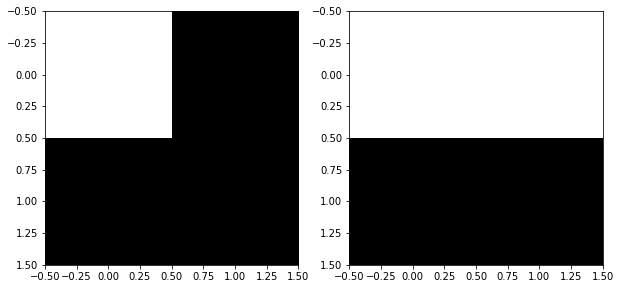

In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch

img = np.zeros([2,2])
img = cv2.rectangle(img, (0,0), (0,0), 1, -1)
print(np.unique(img))
print(img)

img2 = np.zeros([2,2])
img2 = cv2.rectangle(img2, (0,0), (1,0), 1, -1)

bg = np.zeros([2,2])

fig, ax = plt.subplots(1, 2, figsize=(10,10))

ax[0].imshow(img, cmap='gray')
ax[1].imshow(img2, cmap='gray')
plt.show()


In [50]:
correct = (img == bg).sum()
print("correct",correct)
total = img.size
print("total", total)
accuracy = correct / total * 100
print('accuracy', accuracy)

correct 3
total 4
accuracy 75.0


[0. 1.]
iou 0.5


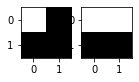

In [69]:
overlap = img * img2
union = img + img2
union[union > 1] = 1
print(np.unique(union))

iou = overlap.sum() / union.sum()
print('iou', iou)

fg, ax = plt.subplots(1,2, figsize=(2,2))
ax[0].imshow(overlap, cmap='gray')
ax[1].imshow(union, cmap='gray')

In [ ]:
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt

def dice_metric(inputs, target):
    intersection = 2.0 * (target * inputs).sum()
    union = target.sum() + inputs.sum()
    if target.sum() == 0 and inputs.sum() == 0:
        return 1.0

    return intersection / union

def dice_loss(inputs, target):
    num = target.size(0)
    inputs = inputs.reshape(num, -1)
    target = target.reshape(num, -1)
    smooth = 1.0
    intersection = (inputs * target)

    print('intersection', intersection.reshape(1080, 1920).shape, intersection.unique())
    plt.imshow(intersection.reshape(1080, 1920), cmap="gray")
    
    dice = (2. * intersection.sum(1) + smooth) / (inputs.sum(1) + target.sum(1) + smooth)
    dice = 1 - dice.sum() / num
    return dice

def bce_dice_loss(inputs, target):
    dicescore = dice_loss(inputs, target)
    bcescore = nn.BCELoss()
    bceloss = bcescore(inputs, target)

    return bceloss + dicescore


def meanIOU(target, predicted):
    if target.shape != predicted.shape:
        print("target has dimension", target.shape, ", predicted values have shape", predicted.shape)
        return
        
    if target.dim() != 4:
        print("target has dim", target.dim(), ", Must be 4.")
        return
    
    iousum = 0
    for i in range(target.shape[0]):
        target_arr = target[i, :, :, :].clone().detach().cpu().numpy().argmax(0)
        predicted_arr = predicted[i, :, :, :].clone().detach().cpu().numpy().argmax(0)
        
        intersection = np.logical_and(target_arr, predicted_arr).sum()
        union = np.logical_or(target_arr, predicted_arr).sum()
        if union == 0:
            iou_score = 0
        else :
            iou_score = intersection / union
        iousum +=iou_score
        
    miou = iousum/target.shape[0]
    return miou

#iou = bce_dice_loss(torch.from_numpy(mask.reshape(1,1,1080,1920)), torch.from_numpy(output.reshape(1,1,1080,1920)))
dm = dice_metric(torch.from_numpy(mask.reshape(1,1,1080,1920)), torch.from_numpy(output.reshape(1,1,1080,1920)))
print("dice matrix", dm.item())

dl = dice_loss(torch.from_numpy(mask.reshape(1,1,1080,1920)), torch.from_numpy(output.reshape(1,1,1080,1920)))
print("dice lose", dl.item())